# 개별 코드

In [1]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# 데이터 불러오기
from sklearn import datasets

raw_wine = datasets.load_wine()

In [3]:
# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

In [4]:
# 피쳐 데이터 차원 확인
print(X.shape)

(178, 13)


In [5]:
# 타겟 데이터 종류 확인
print(set(y))

{0, 1, 2}


In [6]:
# 타겟 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical

y_hot = to_categorical(y) 
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [7]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te=train_test_split(X, y_hot, 
                                        random_state=0)

In [8]:
# 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

n_feat = X_tn.shape[1]
n_class = len(set(y))
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))

In [9]:
# 신경망 모형 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________

In [10]:
# 모형 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [11]:
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Epoch 1/30
27/27 [==============================] - 0s 808us/step - loss: 1.9798 - accuracy: 0.3459
Epoch 2/30
27/27 [==============================] - 0s 693us/step - loss: 1.6155 - accuracy: 0.3835
Epoch 3/30
27/27 [==============================] - 0s 693us/step - loss: 1.2918 - accuracy: 0.3985
Epoch 4/30
27/27 [==============================] - 0s 693us/step - loss: 1.0279 - accuracy: 0.4436
Epoch 5/30
27/27 [==============================] - 0s 693us/step - loss: 0.9092 - accuracy: 0.5263
Epoch 6/30
27/27 [==============================] - 0s 693us/step - loss: 0.8728 - accuracy: 0.6015
Epoch 7/30
27/27 [==============================] - 0s 693us/step - loss: 0.8734 - accuracy: 0.5639
Epoch 8/30
27/27 [==============================] - 0s 693us/step - loss: 0.7951 - accuracy: 0.6241
Epoch 9/30
27/27 [==============================] - 0s 693us/step - loss: 0.8200 - accuracy: 0.5940
Epoch 10/30
27/27 [==============================] - 0s 654us/step - loss: 0.7862 - accuracy: 0.6165

In [12]:
# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

5/5 [==============================] - 0s 1ms/step - loss: 1.6785 - accuracy: 0.6541
0.6541353464126587


In [13]:
# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

2/2 [==============================] - 0s 2ms/step - loss: 1.8092 - accuracy: 0.6444
0.644444465637207


In [14]:
import numpy as np

epoch = np.arange(1,epo+1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [15]:
accuracy = hist.history['accuracy'] 
print(accuracy)

[0.3458646535873413, 0.3834586441516876, 0.39849624037742615, 0.4436090290546417, 0.5263158082962036, 0.6015037298202515, 0.5639097690582275, 0.6240601539611816, 0.5939849615097046, 0.61654132604599, 0.6616541147232056, 0.6842105388641357, 0.6842105388641357, 0.6992481350898743, 0.7142857313156128, 0.7744361162185669, 0.7518796920776367, 0.7518796920776367, 0.7443609237670898, 0.7894737124443054, 0.7969924807548523, 0.7669172883033752, 0.8421052694320679, 0.8345864415168762, 0.8270676732063293, 0.8270676732063293, 0.8646616339683533, 0.8345864415168762, 0.8345864415168762, 0.8421052694320679]


In [16]:
loss = hist.history['loss'] 
print(loss)

[1.9797742366790771, 1.6155287027359009, 1.2918163537979126, 1.0279443264007568, 0.9091539978981018, 0.8727607727050781, 0.8733513951301575, 0.7951136827468872, 0.8200011849403381, 0.7861717343330383, 0.7411368489265442, 0.7207068800926208, 0.7283986806869507, 0.720860481262207, 0.661672830581665, 0.6384365558624268, 0.6166645288467407, 0.63180011510849, 0.7049688696861267, 0.5677863955497742, 0.5816552042961121, 0.5671985745429993, 0.4888032078742981, 0.5790027379989624, 0.5100629925727844, 0.4759792983531952, 0.4275209605693817, 0.4649997353553772, 0.43843644857406616, 0.46210217475891113]


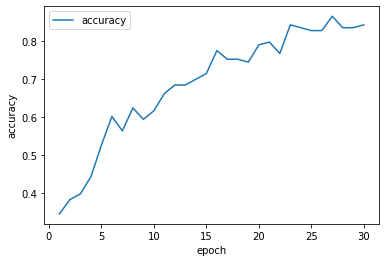

In [17]:
# 정확도 학습 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

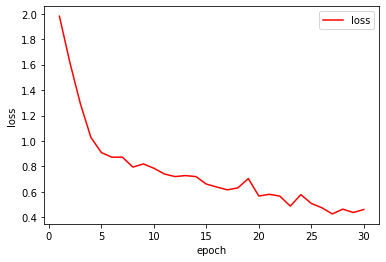

In [18]:
# 손실 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, loss,'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# 통합코드

(178, 13)
{0, 1, 2}
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                280       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 63        
                                                                 
 activation_3 (Activation)   (None, 3)                 0         
                                                                 
Total params: 423
Trainable params: 383
Non-trainable params: 40
___________________________________

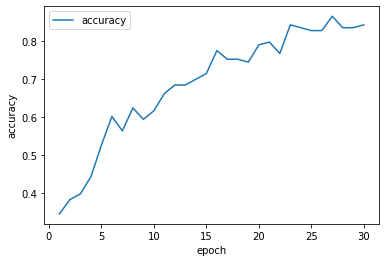

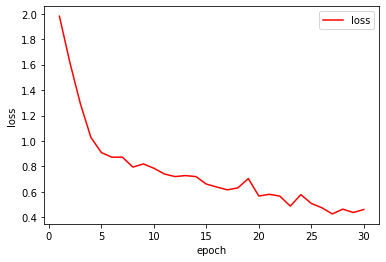

In [19]:
from sklearn import datasets
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

import matplotlib.pyplot as plt

# 랜덤 시드 설정
np.random.seed(0)
tf.random.set_seed(0)

# 데이터 불러오기
raw_wine = datasets.load_wine()

# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

# 피쳐 데이터 차원 확인
print(X.shape)

# 타겟 데이터 종류 확인
print(set(y))

# 타겟 데이터 원-핫 인코딩
y_hot = to_categorical(y) 

# 트레이닝/테스트 데이터 분할
X_tn, X_te, y_tn, y_te=train_test_split(X, y_hot, 
                                        random_state=0)

# 신경망 생성
n_feat = X_tn.shape[1]
n_class = len(set(y))
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))

# 신경망 모형 구조 확인
model.summary()

# 모형 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])


epoch = np.arange(1,epo+1)
accuracy = hist.history['accuracy'] 
loss = hist.history['loss'] 

# 정확도 학습 그래프
plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 손실 그래프
plt.plot(epoch, loss,'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()